<a href="https://colab.research.google.com/github/bryansb/simulacion/blob/main/Tarea2/Tarea2_SarmientoBryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 2 - Matplot/Plotly**
### **Nombre:** Douglas Bryan Sarmiento Basurto
### **Asignatura:** Simulación

### 1. Analizar los siguientes datos:

In [1]:
# Librerias necesarias
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

from google.colab import files

In [3]:
# Subir archivos ccon los datos
uploaded = files.upload()

Saving fifa_datos.csv to fifa_datos (2).csv


In [4]:
# Obtener csv con los datos requeridos
fifa_data = pd.read_csv(io.StringIO(uploaded['fifa_datos.csv'].decode('utf-8')))

# Mostrar los primeros N datos.
fifa_data.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
# Mostrar la información y tipos de datos del dataset
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### 2. Utilizar Matplot y Plotly para realizar las graficas:

#### 2.1. Con los datos de la FIFA, organizar a los jugadores de acuerdo al peso en las siguientes escalas, y generar un cuadro tipo PIE.

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

In [83]:
# Analizamos cómo se representan los datos
fifa_data['Weight'].head(10)

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
5    163lbs
6    146lbs
7    190lbs
8    181lbs
9    192lbs
Name: Weight, dtype: object

In [82]:
# Convertimos los datos a numéricos
weight = fifa_data['Weight'].replace({'lbs':''}, regex=True)
players_weight = pd.DataFrame(weight) 
players_weight['Weight'] = pd.to_numeric(players_weight['Weight'])
players_weight.head(10)

,Weight
0,159.0
1,183.0
2,150.0
3,168.0
4,154.0
5,163.0
6,146.0
7,190.0
8,181.0
9,192.0


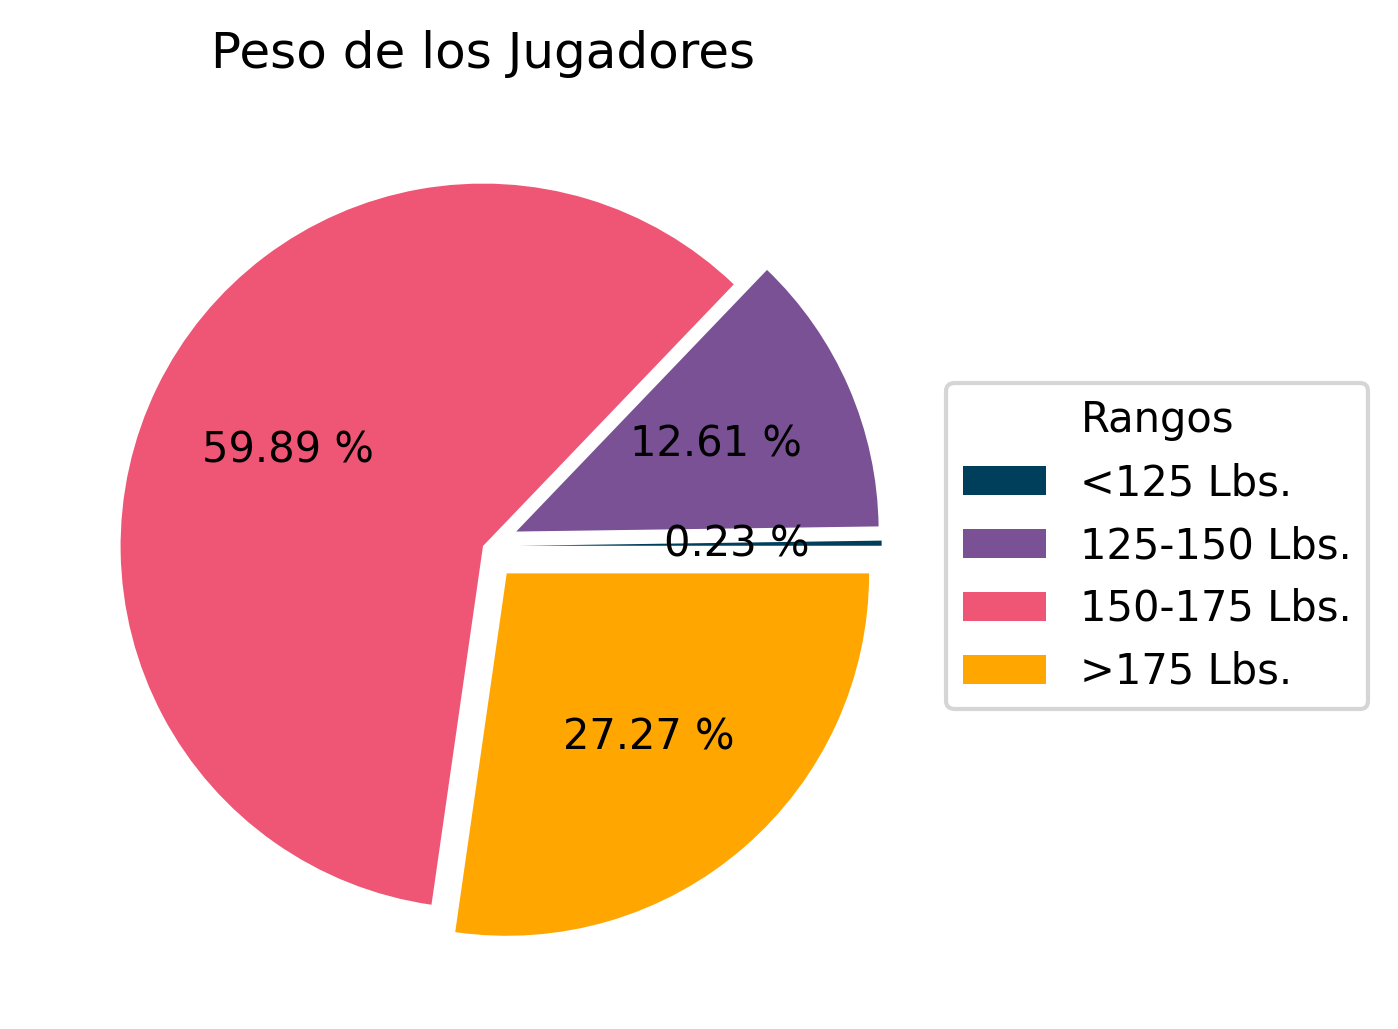


	 Valores totales del conteo
Menores a 125lbs: 41 jugadores
Entre 125lbs y 150lbs: 2290 jugadores
Entre 150lbs y 175lbs: 10876 jugadores
Igual o mayor a 175lbs: 4952 jugadores


In [108]:
# Separar los valores en rangos
under = players_weight.loc[players_weight['Weight'] < 125].count()[0]
between1 = players_weight.loc[(players_weight['Weight'] >= 125) & 
                              (players_weight['Weight'] < 150)].count()[0]
between2 = players_weight.loc[(players_weight['Weight'] >= 150) & 
                              (players_weight['Weight'] < 175)].count()[0]
above = players_weight.loc[players_weight['Weight'] >= 175].count()[0]

# Se definen parámetros para la gráfica
labels = ['<125 Lbs.', '125-150 Lbs.', '150-175 Lbs.', '>175 Lbs.']
colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
explode = (0.1, 0.1, 0, 0.1)

# Se crea y presenta la figura
plt.figure(dpi=300)
plt.pie([under, between1, between2, above], 
        colors=colors, autopct='%1.2f %%', explode=explode)
plt.title('Peso de los Jugadores')
plt.legend(labels, 
           title = 'Rangos', 
           loc = 'center right', 
           bbox_to_anchor = (1, 0, 0.5, 1))
plt.show()

# Se visualizan los conteos
print(f'\n\t Valores totales del conteo')
print(f'Menores a 125lbs: {under} jugadores')
print(f'Entre 125lbs y 150lbs: {between1} jugadores')
print(f'Entre 150lbs y 175lbs: {between2} jugadores')
print(f'Igual o mayor a 175lbs: {above} jugadores')

#### 2.2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

##### 2.2.1. Gráfica tomando solos los valores dados (Datos discretos - Digrama de Barras)

In [86]:
# Analizamos cómo se presentan los datos
fifa_data['Overall'].head(10)

0    94
1    94
2    92
3    91
4    91
5    91
6    91
7    91
8    91
9    90
Name: Overall, dtype: int64

In [142]:
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center")

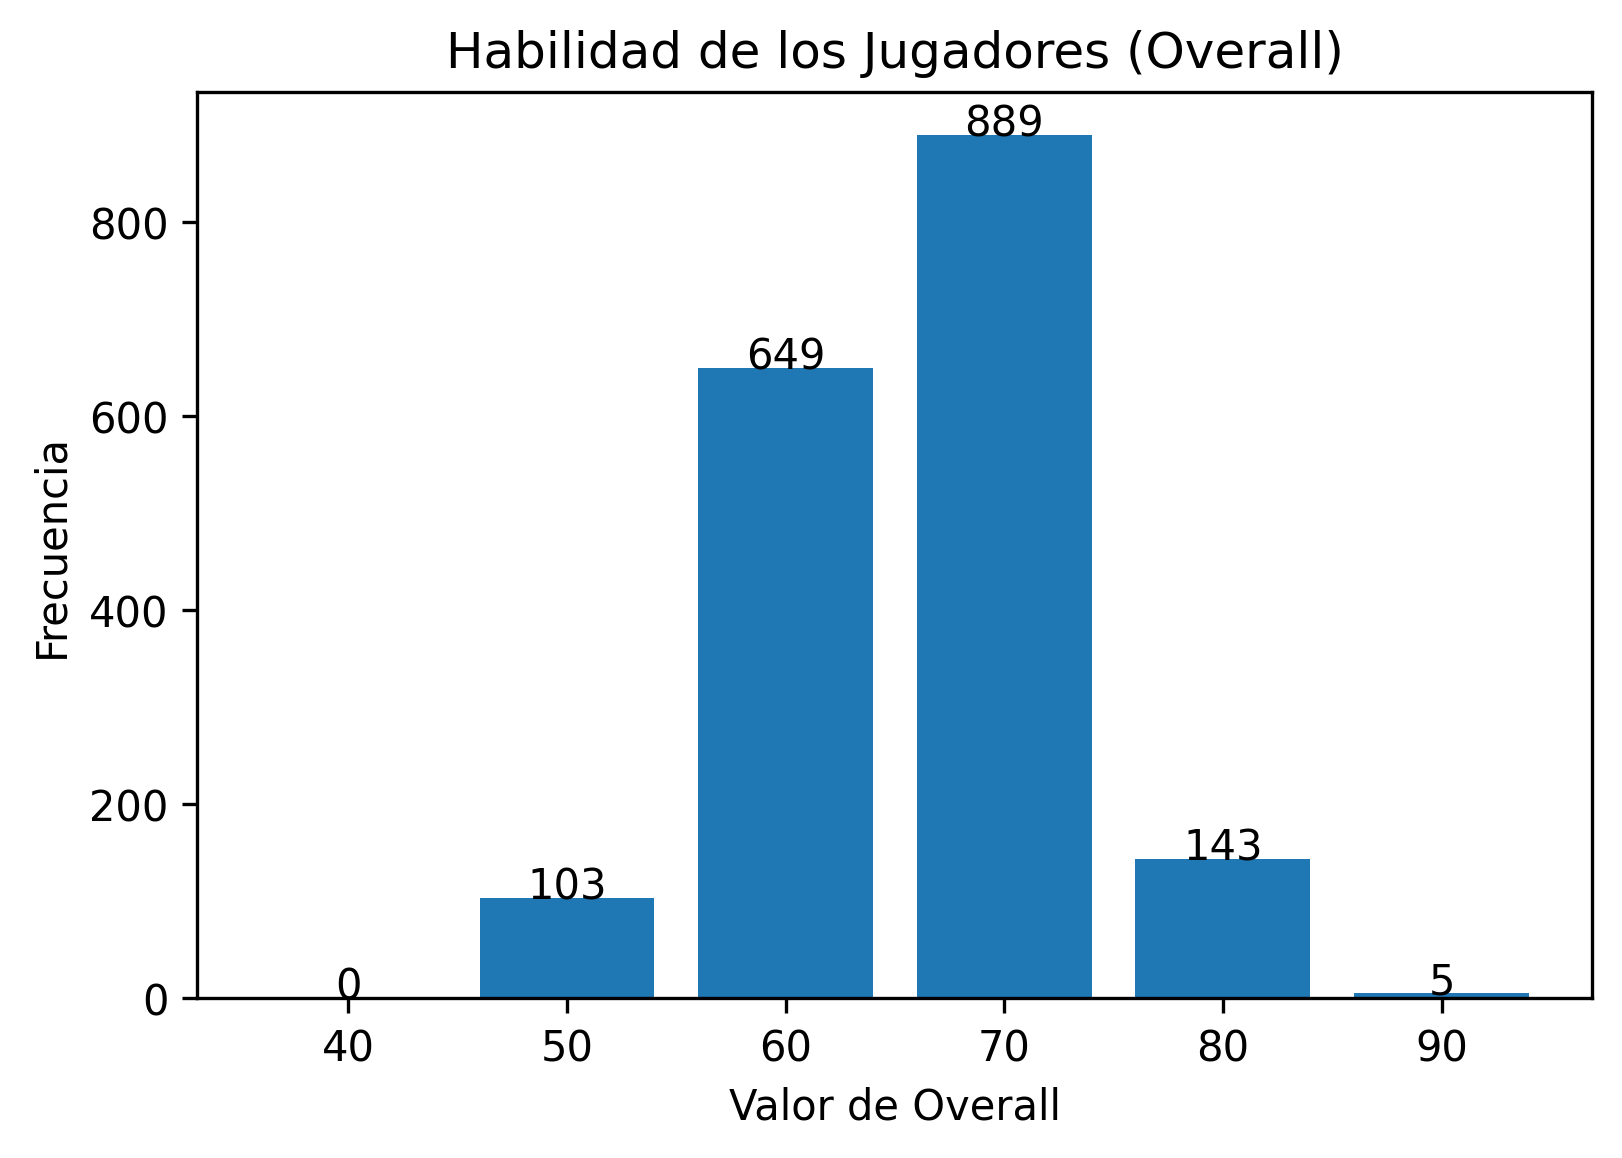

In [143]:
overall_values = [40, 50, 60, 70, 80, 90]
overall_counts = []

# Se calculan las frecuencias
for ov in overall_values:
  overall_temp = fifa_data.loc[fifa_data['Overall'] == ov].count()[0]
  overall_counts.append(overall_temp)

# Parámetros para la gráfica
labels = ['40', '50', '60', '70', '80', '90']

plt.figure(dpi=300)
plt.bar(labels, overall_counts)
add_value_label(labels, overall_counts)
plt.title('Habilidad de los Jugadores (Overall)')
plt.xlabel('Valor de Overall')
plt.ylabel('Frecuencia')
plt.show()

##### 2.2.2. Gráfica tomando rangos entre los valores dados (Datos no discretos - Histograma)

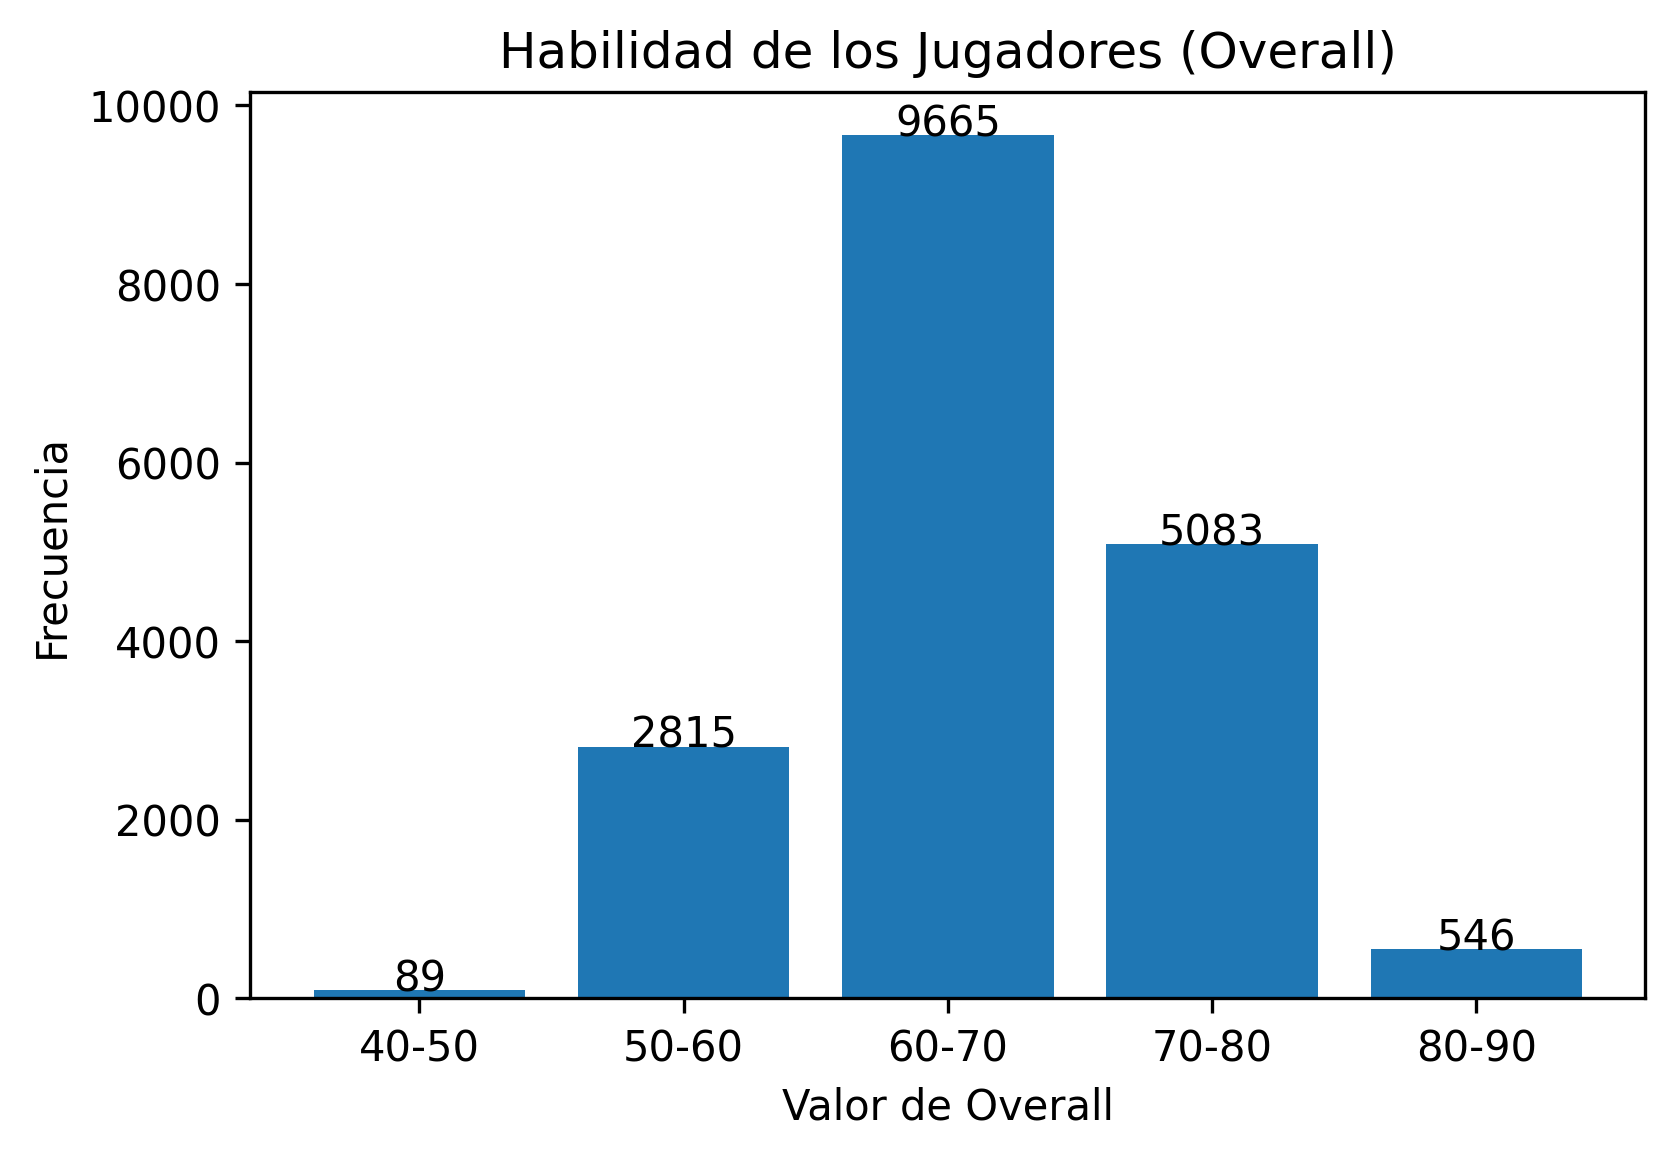


	 Valores totales del conteo
Entre 40 y 50: 89 jugadores
Entre 50 y 60: 2815 jugadores
Entre 60 y 70: 9665 jugadores
Entre 70 y 80: 5083 jugadores
Entre 80 y 90: 546 jugadores
Entre 90 y 100: 14 jugadores


In [148]:
forty = fifa_data.loc[(fifa_data['Overall'] >= 40) & 
                      (fifa_data['Overall'] < 50)].count()[0]
fifty = fifa_data.loc[(fifa_data['Overall'] >= 50) & 
                      (fifa_data['Overall'] < 60)].count()[0]
sixty = fifa_data.loc[(fifa_data['Overall'] >= 60) & 
                      (fifa_data['Overall'] < 70)].count()[0]
seventy = fifa_data.loc[(fifa_data['Overall'] >= 70) & 
                        (fifa_data['Overall'] < 80)].count()[0]
# eighty = fifa_data.loc[(fifa_data['Overall'] >= 80) & 
#                        (fifa_data['Overall'] < 90)].count()[0]
eighty = fifa_data.loc[(fifa_data['Overall'] >= 80) & 
                       (fifa_data['Overall'] <= 90)].count()[0]
ninety = fifa_data.loc[(fifa_data['Overall'] >= 90) & 
                       (fifa_data['Overall'] <= 100)].count()[0]

# labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
# overall_list = [forty, fifty, sixty, seventy, eighty, ninety]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90']
overall_list = [forty, fifty, sixty, seventy, eighty]

plt.figure(dpi=300)
plt.bar(labels, overall_list)
add_value_label(labels, overall_list)
plt.title('Habilidad de los Jugadores (Overall)')
plt.xlabel('Valor de Overall')
plt.ylabel('Frecuencia')
plt.show()

# Se visualizan los conteos
print(f'\n\t Valores totales del conteo')
print(f'Entre 40 y 50: {forty} jugadores')
print(f'Entre 50 y 60: {fifty} jugadores')
print(f'Entre 60 y 70: {sixty} jugadores')
print(f'Entre 70 y 80: {seventy} jugadores')
print(f'Entre 80 y 90: {eighty} jugadores')
print(f'Entre 90 y 100: {ninety} jugadores')

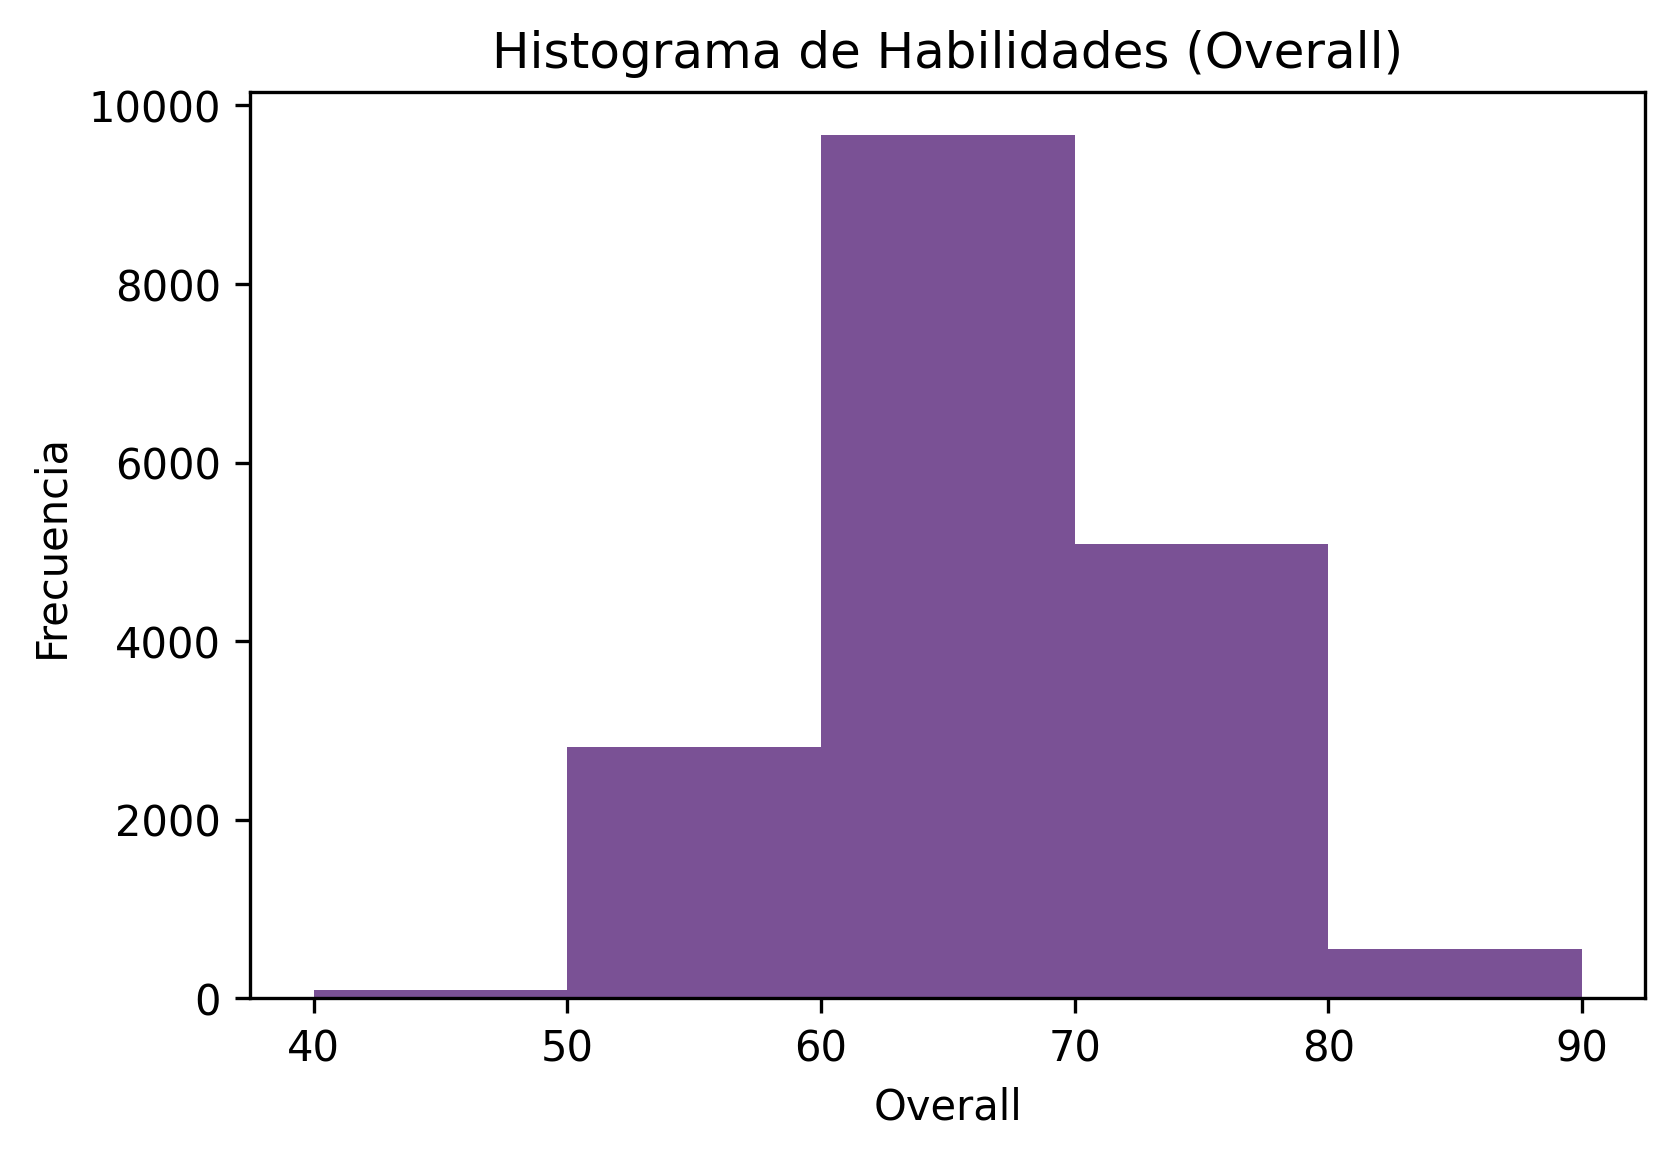

In [150]:
overall = fifa_data['Overall']
bins = [40, 50, 60, 70, 80, 90]

plt.figure(dpi=300)
# La siguiente linea es para separar un poco las barras
# plt.hist(x=overall, bins=bins, color='#F2AB6D', rwidth=0.85)
plt.hist(x=overall, bins=bins, color='#7a5195')
plt.title('Histograma de Habilidades (Overall)')
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.xticks(bins)
plt.show()

### 3. Investigar alguna herramienta o software que permita generar reportes con Python utilizando ¿Google Colab?

#### ReportLab
Enlace del repositorio: https://hg.reportlab.com/hg-public/

Es un conjunto de herramientas que permite crear un documento PDF en Python. Ya que se puede instalar a través de pip install, se puede utilizar en Google Colab, agregando en una celda el siguiente comando:
`!pip install reportlab`

El funcionamiento de esta herramienta es simple, se crea un archivo PDF, y a través de funciones y programación manual se pueden ir agregando diversos elementos al documento.

Más información: https://recursospython.com/guias-y-manuales/crear-documentos-pdf-en-python-con-reportlab/

#### Pandas Profiling
Enlace del repositorio: https://github.com/ydataai/pandas-profiling 

Es una librería que permite generar un reporte personalizable en base a un dataframe; extiende las funcionalidades básicas de la librería Pandas. Dentro de las secciones del reporte se puede encontrar un resumen y descripción de los datos, correlaciones, análisis estadísticos, entre otros.

Otra de sus características, es la posibilidad de exportar el reporte como un archivo HTML. Además, se puede resaltar la integración que tiene con cuadernos de Jupyter.

Más información: https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/ 

In [2]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(fifa_data)

In [10]:
profile

In [11]:
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]